# Pymaceuticals
## Data Analysis
### Matthew Stewart - March 23, 2019
---

### Initial Setup

In [211]:
# Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [212]:
# Hide warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [213]:
# Read data files and initialize dataframes
clinicalTrialData = 'Resources/clinicaltrial_data.csv'
mouseDrugData = 'Resources/mouse_drug_data.csv'

clinical_df = pd.read_csv(clinicalTrialData)
mouse_df = pd.read_csv(mouseDrugData)

# Merge into single dataframe
pymaceuticals_df = pd.merge(clinical_df, mouse_df, on = 'Mouse ID')
pymaceuticals_df.sort_values(by = 'Timepoint', inplace = True)
pymaceuticals_df.reset_index(drop = True, inplace = True)
pymaceuticals_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     i635          0                45.0                 0   Propriva
2     g791          0                45.0                 0   Ramicane
3     w746          0                45.0                 0   Propriva
4     r107          0                45.0                 0   Propriva

In [214]:
# Check for possible missing information
pymaceuticals_df.count()

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

In [215]:
# Check datatypes
pymaceuticals_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug                   object
dtype: object

---

### Tumor Response to Treatment

In [216]:
pyma_mean_group = pymaceuticals_df.groupby(['Drug', 'Timepoint'])
pyma_mean_df = pd.DataFrame(pyma_mean_group['Tumor Volume (mm3)'].mean())
pyma_mean_df.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [217]:
pyma_sem_group = pymaceuticals_df.groupby(['Drug', 'Timepoint'])
pyma_sem_df = pd.DataFrame(pyma_sem_group['Tumor Volume (mm3)'].sem())
pyma_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [218]:
pyma_mean_df_unstack = pyma_mean_df.unstack(level = 0)
pyma_mean_df_unstack.columns = pyma_mean_df_unstack.columns.droplevel()
pyma_mean_df_unstack.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

In [219]:
pyma_sem_df_unstack = pyma_sem_df.unstack(level = 0)
pyma_sem_df_unstack.columns = pyma_sem_df_unstack.columns.droplevel()
pyma_sem_df_unstack.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.448593  0.164505   0.235102  0.264819  0.202385  0.218091   
10          0.702684  0.236144   0.282346  0.357421  0.319415  0.402064   
15          0.838617  0.332053   0.357705  0.580268  0.444378  0.614461   
20          0.909731  0.359482   0.476210  0.726484  0.595260  0.839609   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.231708  0.482955  0.239862   0.188950  
10         0.376195  0.720225  0.433678   0.263949  
15         0.466109  0.770432  0.493261   0.370544  
20         0.555181  0.786199  0.621889   0.533182

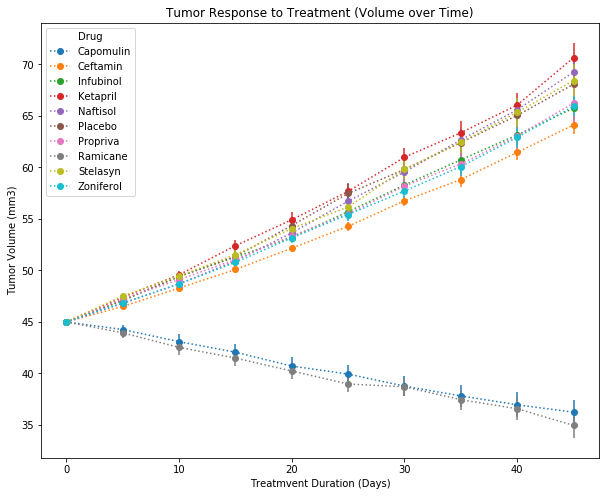

In [220]:
pyma_mean_df_unstack.plot(yerr = pyma_sem_df_unstack, marker = 'o',
                                    linestyle = ':', figsize = (10,8))
plt.xlabel('Treatmvent Duration (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment (Volume over Time)')
plt.savefig('Images/TumorResponseOverTime.png')
plt.show()

---

### Metastatic Response to Treatments

In [221]:
pyma_meanMetastatic_group = pymaceuticals_df.groupby(['Drug', 'Timepoint'])
pyma_meanMetastatic_df = pd.DataFrame(pyma_meanMetastatic_group['Metastatic Sites'].mean())
pyma_meanMetastatic_df.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308

In [222]:
pyma_semMetastatic_group = pymaceuticals_df.groupby(['Drug', 'Timepoint'])
pyma_semMetastatic_df = pd.DataFrame(pyma_semMetastatic_group['Metastatic Sites'].sem())
pyma_semMetastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [223]:
pyma_meanMetastatic_df_unstack = pyma_meanMetastatic_df.unstack(level = 0)
pyma_meanMetastatic_df_unstack.columns = pyma_meanMetastatic_df_unstack.columns.droplevel()
pyma_meanMetastatic_df_unstack.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118

In [224]:
pyma_semMetastatic_df_unstack = pyma_semMetastatic_df.unstack(level = 0)
pyma_semMetastatic_df_unstack.columns = pyma_semMetastatic_df_unstack.columns.droplevel()
pyma_semMetastatic_df_unstack.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.074833  0.108588   0.091652  0.098100  0.093618  0.100947   
10          0.125433  0.152177   0.159364  0.142018  0.163577  0.115261   
15          0.132048  0.180625   0.194015  0.191381  0.158651  0.190221   
20          0.161621  0.241034   0.234801  0.236680  0.181731  0.234064   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.095219  0.066332  0.087178   0.077709  
10         0.105690  0.090289  0.123672   0.109109  
15         0.136377  0.115261  0.153439   0.111677  
20         0.171499  0.119430  0.200905   0.166378

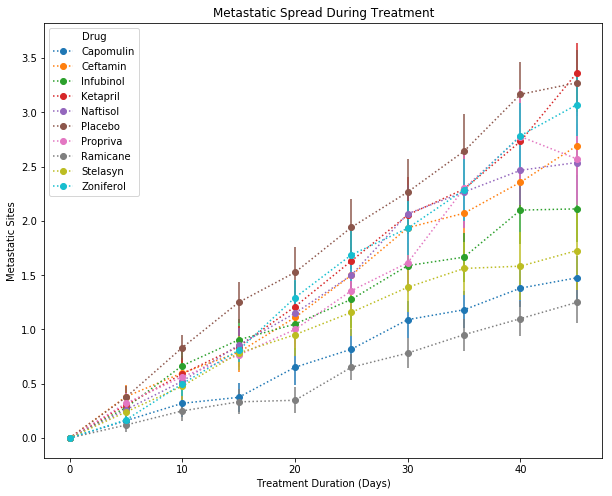

In [225]:
pyma_meanMetastatic_df_unstack.plot(yerr = pyma_semMetastatic_df_unstack, marker = 'o',
                                    linestyle = ':', figsize = (10,8))
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.savefig('Images/MetastaticSpreadOverTime.png')
plt.show()

---

### Survival Rates

In [226]:
pyma_count_group = pymaceuticals_df.groupby(['Drug', 'Timepoint'])
pyma_count_df = pd.DataFrame(pyma_count_group['Mouse ID'].count())
pyma_count_df.rename(columns = {'Mouse ID': 'Mouse Count'}, inplace = True)
pyma_count_df.head(20)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13

In [227]:
pyma_count_df_unstack = pyma_count_df.unstack(level = 0)
pyma_count_df_unstack.columns = pyma_count_df_unstack.columns.droplevel()
pyma_count_df_unstack.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

In [228]:
pyma_count_df_percent = pyma_count_df_unstack.copy()
startingValue = []

for j in range(len(pyma_count_df_percent.columns)):
    startingValue.append(pyma_count_df_percent.iloc[0, j])

for i in range(len(pyma_count_df_percent.index)):
    for j in range(len(pyma_count_df_percent.columns)):
        pyma_count_df_percent.iloc[i, j] = pyma_count_df_percent.iloc[i, j] * 100 / startingValue[j]
pyma_count_df_percent.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0              100.0     100.0      100.0     100.0     100.0    100.0   
5              100.0      84.0      100.0      92.0      92.0     96.0   
10             100.0      80.0       84.0      88.0      84.0     96.0   
15              96.0      76.0       84.0      76.0      84.0     80.0   
20              92.0      72.0       80.0      76.0      80.0     76.0   

Drug         Propriva  Ramicane    Stelasyn  Zoniferol  
Timepoint                                               
0          100.000000     100.0  100.000000      100.0  
5           96.153846     100.0   96.153846       96.0  
10          88.461538      96.0   88.461538       88.0  
15          65.384615      96.0   88.461538       84.0  
20          65.384615      92.0   80.769231       68.0

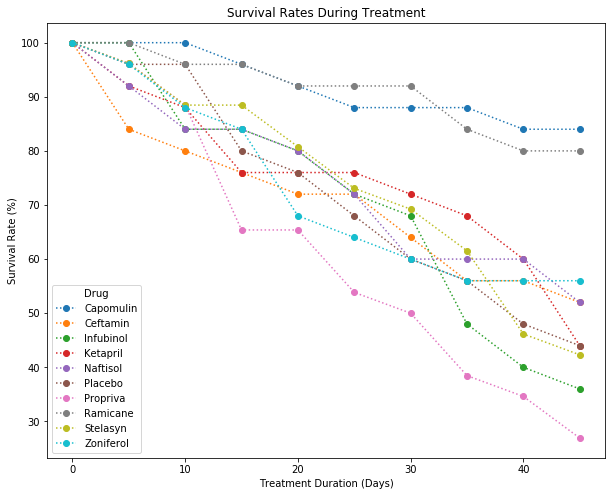

In [229]:
pyma_count_df_percent.plot(marker = 'o', linestyle = ':', figsize = (10,8))
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rates During Treatment')
plt.savefig('Images/SurvivalRatesOverTime.png')
plt.show()

---

### Tumor Response Summary

In [230]:
pyma_mean_df_unstack

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

In [231]:
finalChangePercent = []
for j in range(len(pyma_mean_df_unstack.columns)):
    finalChangePercent.append(((pyma_mean_df_unstack.iloc[-1][j] - pyma_mean_df_unstack.iloc[0][j]) * 100) /
                                pyma_mean_df_unstack.iloc[0][j])

finalChangePercent_df = pd.DataFrame({
    'Drug': pyma_mean_df_unstack.columns,
    'Tumor Response (%)': finalChangePercent
})

finalChangePercent_df

Drug  Tumor Response (%)
0  Capomulin          -19.475303
1   Ceftamin           42.516492
2  Infubinol           46.123472
3   Ketapril           57.028795
4   Naftisol           53.923347
5    Placebo           51.297960
6   Propriva           47.241175
7   Ramicane          -22.320900
8   Stelasyn           52.085134
9  Zoniferol           46.579751

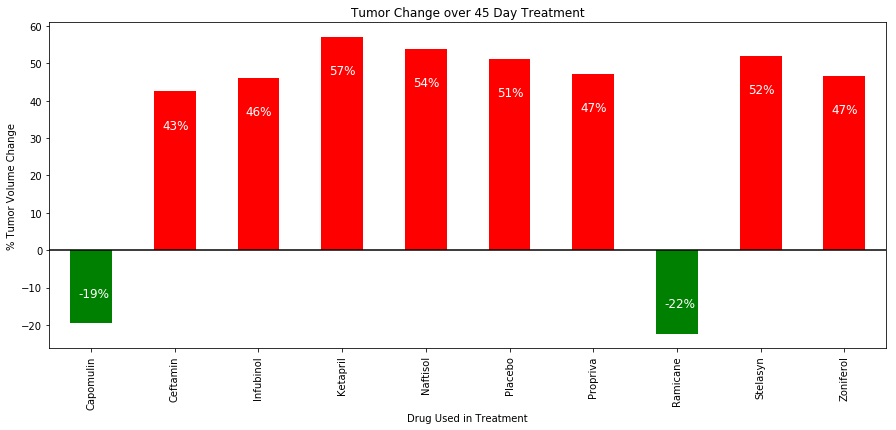

In [232]:
ax = finalChangePercent_df.plot(kind = 'bar', color = [np.where(finalChangePercent_df['Tumor Response (%)'] < 0, 'g', 'r')],
                                figsize = (15, 6), legend = False, title = 'Tumor Change over 45 Day Treatment')
ax.set_xticklabels(finalChangePercent_df['Drug'])
ax.set_xlabel('Drug Used in Treatment')
ax.set_ylabel('% Tumor Volume Change')

barLabels = ['{:.0%}'.format(label / 100) for label in finalChangePercent]

for i in range(len(finalChangePercent)):
    if finalChangePercent[i] >= 0:
        ax.text(ax.patches[i].get_x() + .1, ax.patches[i].get_height()-10, barLabels[i],
                fontsize = 12, color = 'white')
    else:
        ax.text(ax.patches[i].get_x() + .1, ax.patches[i].get_height()+7, barLabels[i],
                fontsize = 12, color = 'white')

plt.hlines(0, -1, len(finalChangePercent_df['Drug']) + 1)

plt.savefig('Images/TumorChangePercent.png')
plt.show()